In [ ]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
X.shape, x.shape

((3, 2), (2,))

In [ ]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.8046956 , 0.12001054],
       [0.18151369, 0.75398349],
       [0.39094466, 0.33074604]])

In [ ]:
X > 0.5

array([[ True, False],
       [False,  True],
       [False, False]])

In [ ]:
X[X > 0.5] = 1
X

array([[1.        , 0.12001054],
       [0.18151369, 1.        ],
       [0.39094466, 0.33074604]])

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

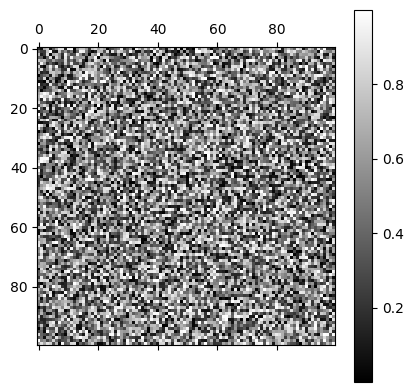

In [ ]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

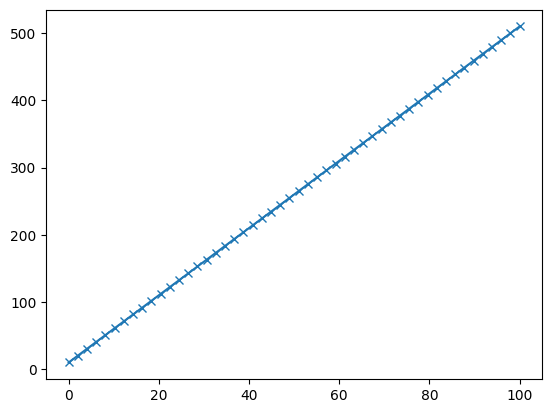

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


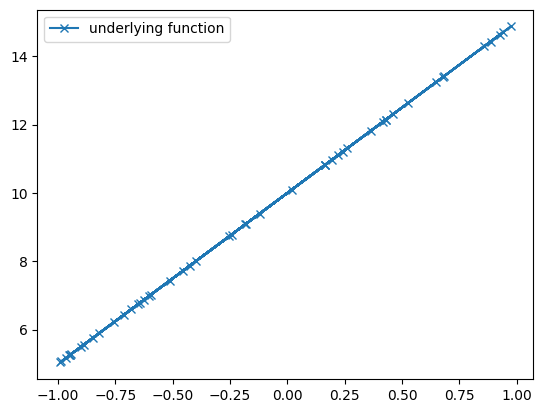

In [ ]:

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

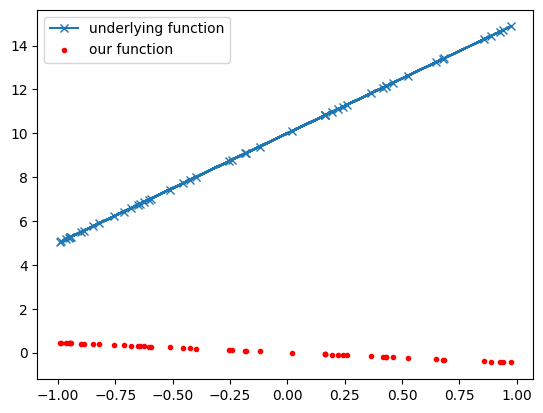

In [ ]:

class Linear:
  def __init__(self, input_dim, num_hidden=1):

    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 95.9292294535205


In [ ]:


class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n

    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

94.52185343951889
62.576085995133695


Epoch 0, loss 100.86950790559284
Epoch 5, loss 22.536489261194824
Epoch 10, loss 7.921549175847149
Epoch 15, loss 3.3540949342480495
Epoch 20, loss 1.491638226260178
Epoch 25, loss 0.6708065646997267
Epoch 30, loss 0.3024072929933705
Epoch 35, loss 0.136401040374146


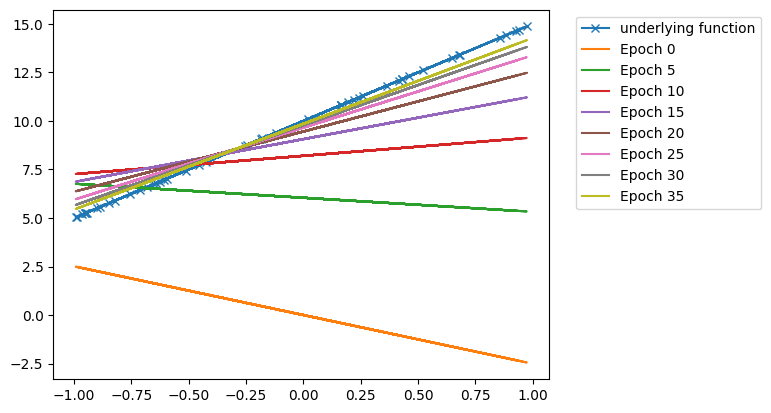

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


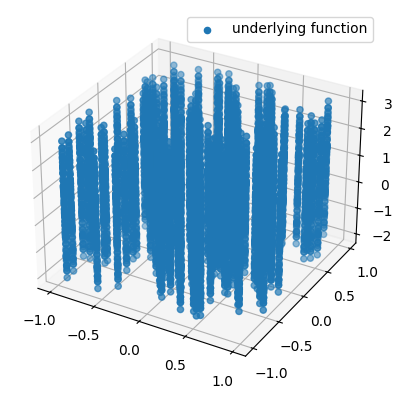

In [ ]:

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))


weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

5.921226243889239


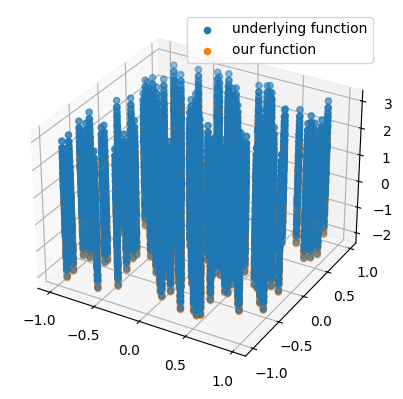

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 5.921226243889239
Epoch 1, loss 5.054732186560299
Epoch 2, loss 4.342475383861254
Epoch 3, loss 3.7485669942096904
Epoch 4, loss 3.247600765836688
Epoch 5, loss 2.8211790336282814
Epoch 6, loss 2.455653521792412
Epoch 7, loss 2.1406475320698286
Epoch 8, loss 1.8680818429667234
Epoch 9, loss 1.6315262854512593
Epoch 10, loss 1.4257627237806554
Epoch 11, loss 1.2464859898501772
Epoch 12, loss 1.090095464688538
Epoch 13, loss 0.9535467585861224
Epoch 14, loss 0.8342436925732174
Epoch 15, loss 0.729957690493171
Epoch 16, loss 0.6387661354178632
Epoch 17, loss 0.5590041110725902
Epoch 18, loss 0.48922580413884253
Epoch 19, loss 0.4281730489326862


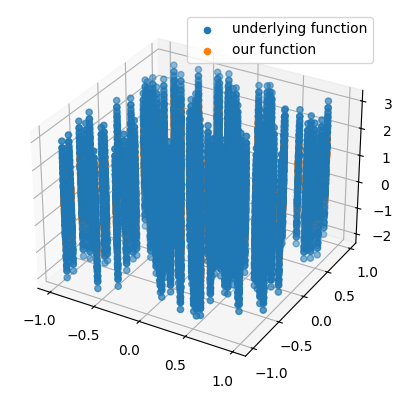

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


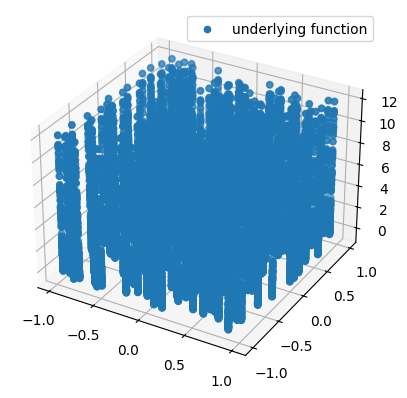

In [ ]:
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 19.160454311082535
Epoch 1, loss 14.8722722283039
Epoch 2, loss 11.892771602951274
Epoch 3, loss 9.78218885353456
Epoch 4, loss 8.254964195346526
Epoch 5, loss 7.124737788871712
Epoch 6, loss 6.26909542283696
Epoch 7, loss 5.606954673144942
Epoch 8, loss 5.084043903415836
Epoch 9, loss 4.663564670895065
Epoch 10, loss 4.320175881788471
Epoch 11, loss 4.03610823274251
Epoch 12, loss 3.798646185198894
Epoch 13, loss 3.598488986722158
Epoch 14, loss 3.4286777413947607
Epoch 15, loss 3.283887837973398
Epoch 16, loss 3.1599579359274292
Epoch 17, loss 3.053572745992679
Epoch 18, loss 2.9620463359150166
Epoch 19, loss 2.8831715999834926
Epoch 20, loss 2.81511366278655
Epoch 21, loss 2.756332780703137
Epoch 22, loss 2.70552731836488
Epoch 23, loss 2.6615906095662605
Epoch 24, loss 2.6235776015466055
Epoch 25, loss 2.590678537141388
Epoch 26, loss 2.5621978129210254
Epoch 27, loss 2.537536730960348
Epoch 28, loss 2.5161792449669815
Epoch 29, loss 2.4976800572568436
Epoch 30, loss 

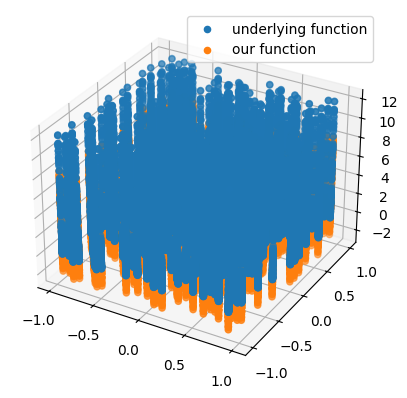

In [ ]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


15.868402695493888


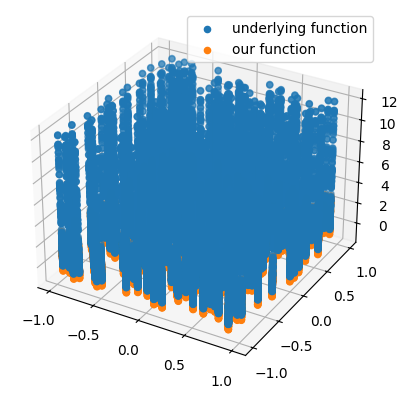

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

17.972640867152887
5.727322610231723


Epoch 0, loss 5.727322610231723
Epoch 1, loss 2.4708605254951066
Epoch 2, loss 1.3983689106617099
Epoch 3, loss 0.9788428192945474
Epoch 4, loss 0.7738567601671573
Epoch 5, loss 0.6536406745781946
Epoch 6, loss 0.5721764058823926
Epoch 7, loss 0.5106857261236241
Epoch 8, loss 0.46311135293186256
Epoch 9, loss 0.4237002011844385
Epoch 10, loss 0.38982439989119
Epoch 11, loss 0.3606311987418161
Epoch 12, loss 0.33467678257395084
Epoch 13, loss 0.3127240809071625
Epoch 14, loss 0.2934794741688805
Epoch 15, loss 0.27566879177358516
Epoch 16, loss 0.26003928157042366
Epoch 17, loss 0.24583567644648346
Epoch 18, loss 0.23147837050018777
Epoch 19, loss 0.2194192303866003
Epoch 20, loss 0.20893843663748796
Epoch 21, loss 0.1993614003024333
Epoch 22, loss 0.18990459090899925
Epoch 23, loss 0.18159144489405896
Epoch 24, loss 0.17427498159047702
Epoch 25, loss 0.16762943259521546
Epoch 26, loss 0.16128485836515374
Epoch 27, loss 0.15573854907742182
Epoch 28, loss 0.1507308323248063
Epoch 29, loss

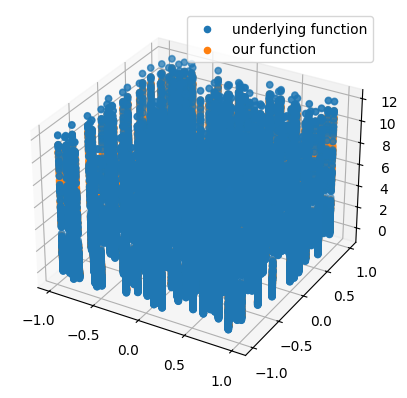

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.2460, grad_fn=<MseLossBackward0>)


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.2460, grad_fn=<MseLossBackward0>)
tensor(11.3483, grad_fn=<MseLossBackward0>)


tensor(11.3483, grad_fn=<MseLossBackward0>)
tensor(8.0045, grad_fn=<MseLossBackward0>)
tensor(5.8149, grad_fn=<MseLossBackward0>)
tensor(4.1377, grad_fn=<MseLossBackward0>)
tensor(2.9253, grad_fn=<MseLossBackward0>)
tensor(2.1265, grad_fn=<MseLossBackward0>)
tensor(1.5874, grad_fn=<MseLossBackward0>)
tensor(1.2292, grad_fn=<MseLossBackward0>)
tensor(0.9887, grad_fn=<MseLossBackward0>)
tensor(0.8217, grad_fn=<MseLossBackward0>)
tensor(0.7039, grad_fn=<MseLossBackward0>)
tensor(0.6164, grad_fn=<MseLossBackward0>)
tensor(0.5486, grad_fn=<MseLossBackward0>)
tensor(0.4963, grad_fn=<MseLossBackward0>)
tensor(0.4546, grad_fn=<MseLossBackward0>)
tensor(0.4204, grad_fn=<MseLossBackward0>)
tensor(0.3920, grad_fn=<MseLossBackward0>)
tensor(0.3679, grad_fn=<MseLossBackward0>)
tensor(0.3469, grad_fn=<MseLossBackward0>)
tensor(0.3287, grad_fn=<MseLossBackward0>)
tensor(0.3128, grad_fn=<MseLossBackward0>)
tensor(0.2987, grad_fn=<MseLossBackward0>)
tensor(0.2863, grad_fn=<MseLossBackward0>)
tensor(0.2

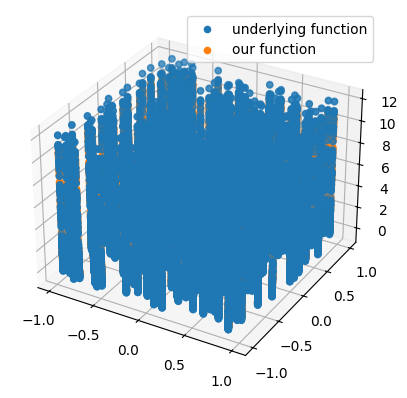

In [ ]:

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ regression (Dense)                   │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.4289  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9002 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7969  
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4617 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2747 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2115 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3103 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1866  
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3406 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3799 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


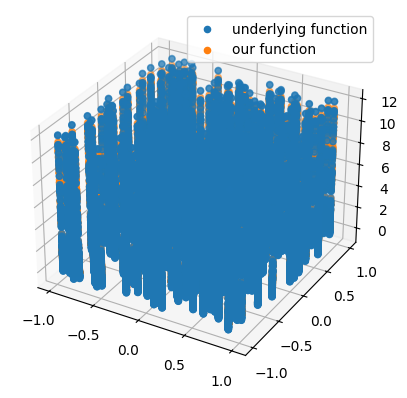

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))